- https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
- https://otexts.com/fpp2/stationarity.html#fig:stationary
- https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/


Predicting the average google search of each keyword in the coming january(month)

# Importing packages and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df= pd.read_csv('multiTimeline.csv')

In [4]:
df.head()

,,,Category: All categories
Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
2004-01,100,31,47
2004-02,75,26,49
2004-03,71,24,46
2004-04,70,22,47


Here the above data is without skiprows, so all the rows displayed. Using skiprows=1 skips first row

In [18]:
df= pd.read_csv('multiTimeline.csv', skiprows=1)

In [19]:
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,47
1,2004-02,75,26,49
2,2004-03,71,24,46
3,2004-04,70,22,47
4,2004-05,73,23,43


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
Month                   192 non-null object
diet: (Worldwide)       192 non-null int64
gym: (Worldwide)        192 non-null int64
finance: (Worldwide)    192 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.1+ KB


# Wrangle the data

In [22]:
df.columns

Index(['Month', 'diet: (Worldwide)', 'gym: (Worldwide)',
       'finance: (Worldwide)'],
      dtype='object')

In [23]:
df.columns=['month','diet','gym','finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,47
1,2004-02,75,26,49
2,2004-03,71,24,46
3,2004-04,70,22,47
4,2004-05,73,23,43


Earlier .info() 'month' datatype object but we need any generic data type. so convert to datetime. set_index can take multiple input for index,pass in form of array. 'inplace' is set to true to change the actual data frame

In [24]:
df.month=pd.to_datetime(df.month)
df.set_index('month',inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,47
2004-02-01,75,26,49
2004-03-01,71,24,46
2004-04-01,70,22,47
2004-05-01,73,23,43


In [25]:
df.columns

Index(['diet', 'gym', 'finance'], dtype='object')

# Exploratory Data Analysis(EDA)

Text(0.5, 0, 'Year')

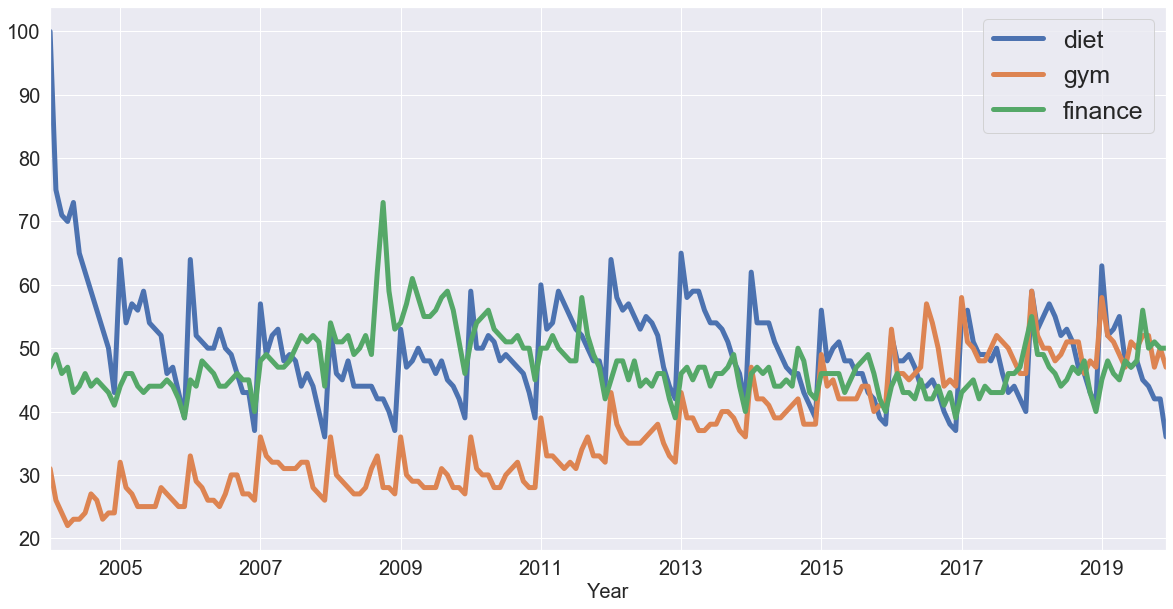

In [36]:
df.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.legend(prop={'size':25})
plt.xlabel('Year',fontsize=20)

Text(0.5, 0, 'Year')

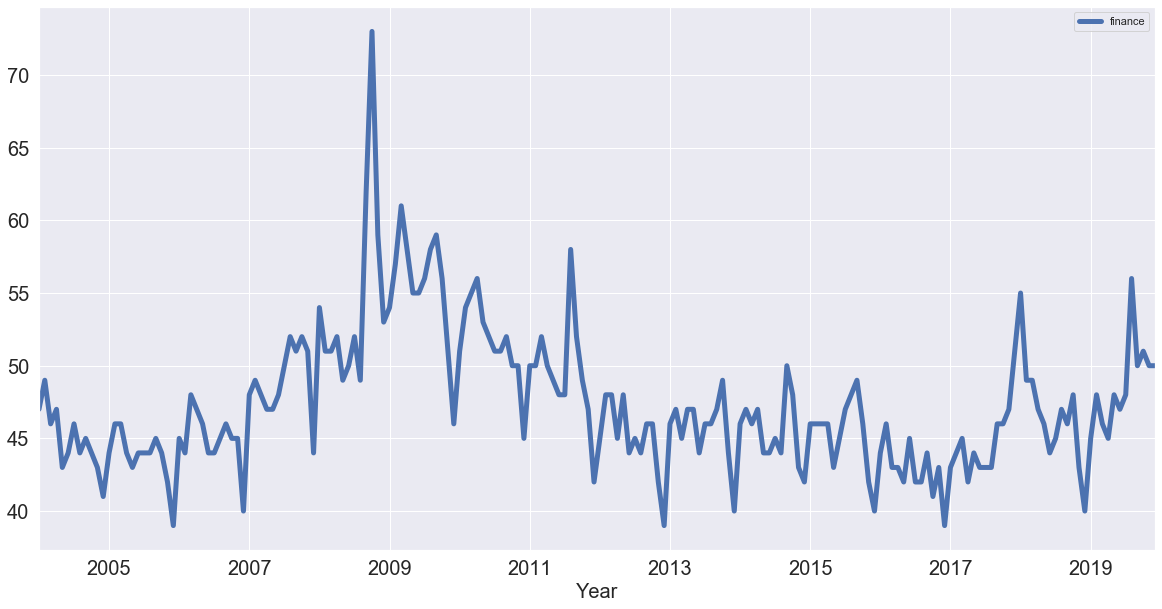

In [27]:
df[['finance']].plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)

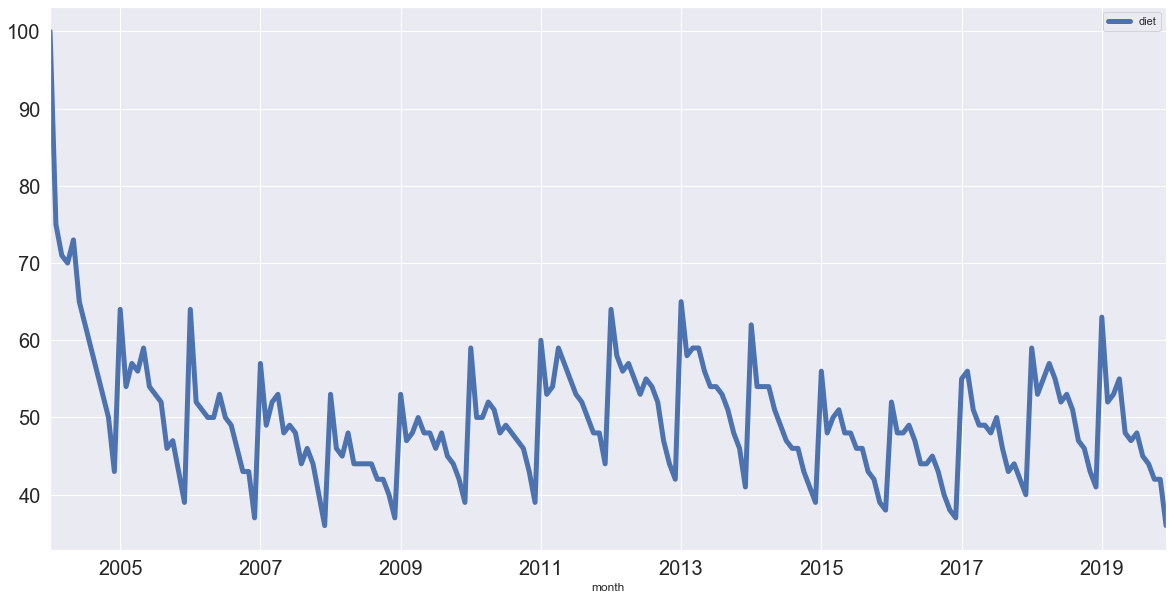

In [33]:
df[['diet']].plot(figsize=(20,10),linewidth=5,fontsize=20)

the first thing to notice is that there is seasonality: each January, there's a big jump.Also there is trend: it seems to go slightly up, then down, back up and then back down.it looks like there are trends and seasonal components to these time series.

## Identifying trends in time series

- rolling average: for each time point, you take the average of the points on either side of it. The number of points is specified by a window size.

We will calculate rolling average of 'diet' using built-in pandas(rolling()) method.

### Rolling average with 12 months window size, also called yearly seasonality

above code is used to extract 'diet' column as a DataFrame

In [39]:
df[['diet']]

,diet
month,
2004-01-01,100
2004-02-01,75
2004-03-01,71
2004-04-01,70
2004-05-01,73
...,...
2019-08-01,45
2019-09-01,44
2019-10-01,42


else you could create pandas series by the following code

In [40]:
df['diet']

month
2004-01-01    100
2004-02-01     75
2004-03-01     71
2004-04-01     70
2004-05-01     73
             ... 
2019-08-01     45
2019-09-01     44
2019-10-01     42
2019-11-01     42
2019-12-01     36
Name: diet, Length: 192, dtype: int64

method chaining, rolling of 12 months

- rolling() in python: we take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time. In a very simple case all the ‘k’ values are equally weighted.

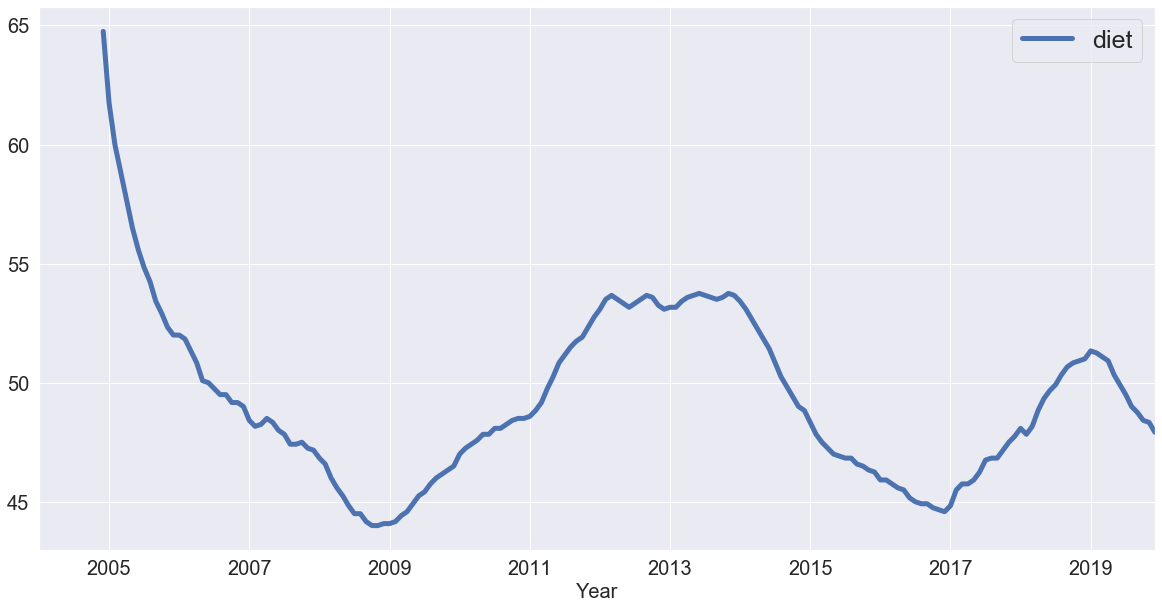

In [67]:
diet=df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.legend(prop={'size':25})

- rolling().mean() :performing rolling on the data and simultaneously getting mean.

In [58]:
z=diet.rolling(3).mean()

In [59]:
z

,diet
month,
2004-01-01,NaN
2004-02-01,NaN
2004-03-01,82.000000
2004-04-01,72.000000
2004-05-01,71.333333
...,...
2019-08-01,46.666667
2019-09-01,45.666667
2019-10-01,43.666667


-  view entire dataframe with maxcolumns and rows

In [63]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(z)

                 diet
month                
2004-01-01        NaN
2004-02-01        NaN
2004-03-01  82.000000
2004-04-01  72.000000
2004-05-01  71.333333
2004-06-01  69.333333
2004-07-01  66.666667
2004-08-01  62.000000
2004-09-01  59.000000
2004-10-01  56.000000
2004-11-01  53.000000
2004-12-01  48.666667
2005-01-01  52.333333
2005-02-01  53.666667
2005-03-01  58.333333
2005-04-01  55.666667
2005-05-01  57.333333
2005-06-01  56.333333
2005-07-01  55.333333
2005-08-01  53.000000
2005-09-01  50.333333
2005-10-01  48.333333
2005-11-01  45.333333
2005-12-01  43.000000
2006-01-01  48.666667
2006-02-01  51.666667
2006-03-01  55.666667
2006-04-01  51.000000
2006-05-01  50.333333
2006-06-01  51.000000
2006-07-01  51.000000
2006-08-01  50.666667
2006-09-01  48.333333
2006-10-01  46.000000
2006-11-01  44.000000
2006-12-01  41.000000
2007-01-01  45.666667
2007-02-01  47.666667
2007-03-01  52.666667
2007-04-01  51.333333
2007-05-01  51.000000
2007-06-01  50.000000
2007-07-01  48.333333
2007-08-01

In [73]:
y=diet.rolling(3,win_type='triang').sum()

In [74]:
y

,diet
month,
2004-01-01,NaN
2004-02-01,NaN
2004-03-01,160.5
2004-04-01,143.5
2004-05-01,142.0
...,...
2019-08-01,94.0
2019-09-01,91.0
2019-10-01,87.5


In [75]:
x=diet.rolling(3,win_type='triang').mean()
x

,diet
month,
2004-01-01,NaN
2004-02-01,NaN
2004-03-01,80.25
2004-04-01,71.75
2004-05-01,71.00
...,...
2019-08-01,47.00
2019-09-01,45.50
2019-10-01,43.75


Text(0, 0.5, 'Time')

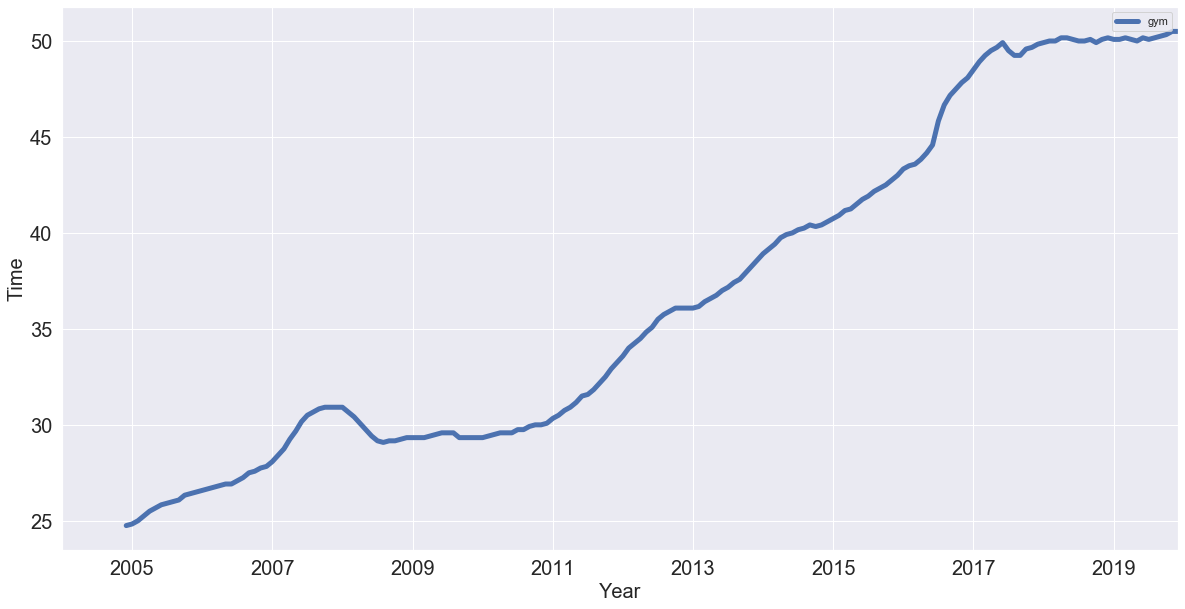

In [77]:
gym=df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Time',fontsize=20)

we have removed seasonality and upward trend is visible for gym

- gym and diet plot on single figure

Text(0.5, 0, 'Year')

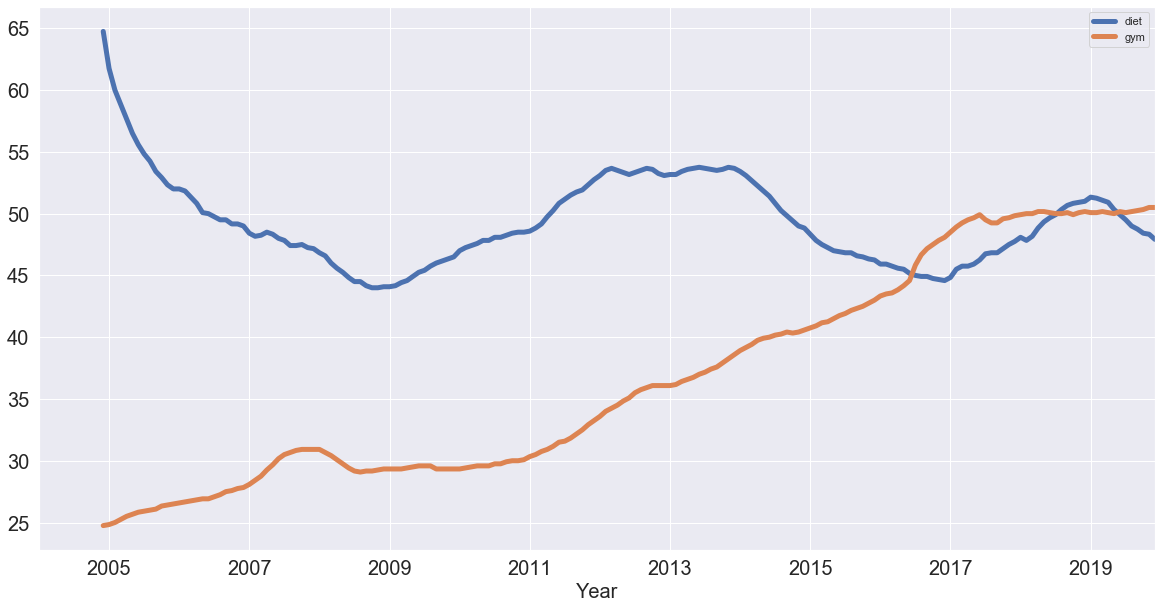

In [78]:
df_rm=pd.concat([diet.rolling(12).mean(),gym.rolling(12).mean()],axis=1)
df_rm.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)

In [79]:
df_rm

,diet,gym
month,,
2004-01-01,NaN,NaN
2004-02-01,NaN,NaN
2004-03-01,NaN,NaN
2004-04-01,NaN,NaN
2004-05-01,NaN,NaN
...,...,...
2019-08-01,49.000000,50.166667
2019-09-01,48.750000,50.250000
2019-10-01,48.416667,50.333333


- Seasonality: the repetitive nature of your time series
- remove the trend from a time series, so that you can more easily investigate seasonality
- To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal

- Another way to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing").
- each point is replaced by the difference between its value and the value of the previous point.

- Transformations such as logarithms can help to stabilise the variance of a time series. 
- Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

### Stationary: A stationary series is one in which the properties – mean, variance and covariance, do not vary with time.

time series are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary.

### First-order differencing
difference(t) = observation(t) - observation(t-1)

Text(0.5, 0, 'Year')

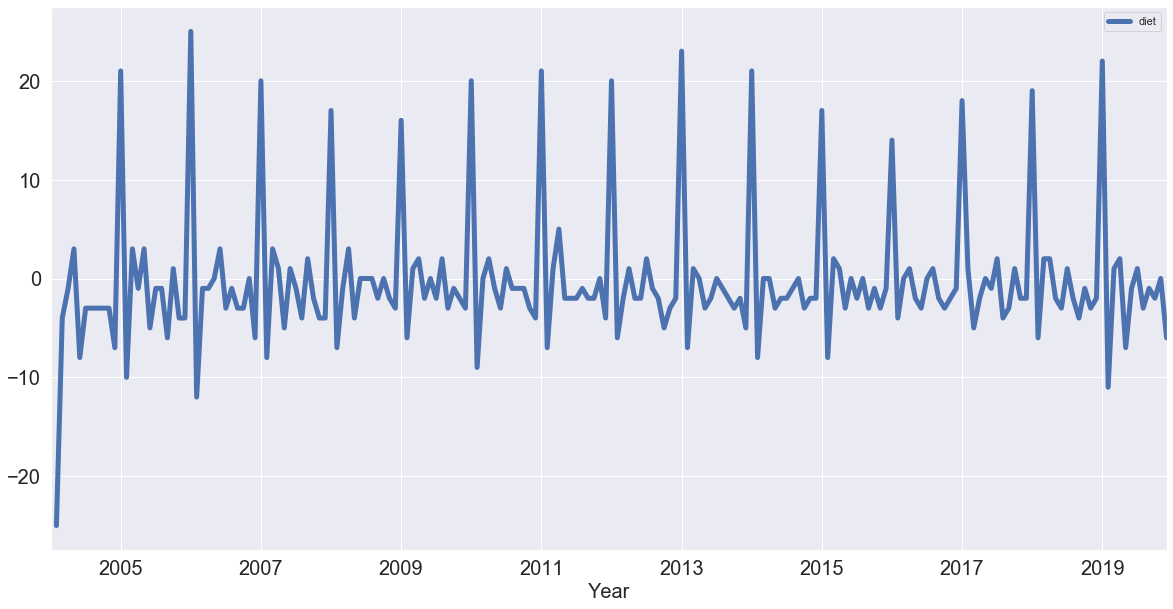

In [85]:
diet.diff().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year', fontsize=20)

you have removed much of the trend and you can really see the peaks in January every year. Each January, there is a huge spike of 20 or more percent on the highest search item

Text(0.5, 0, 'Year')

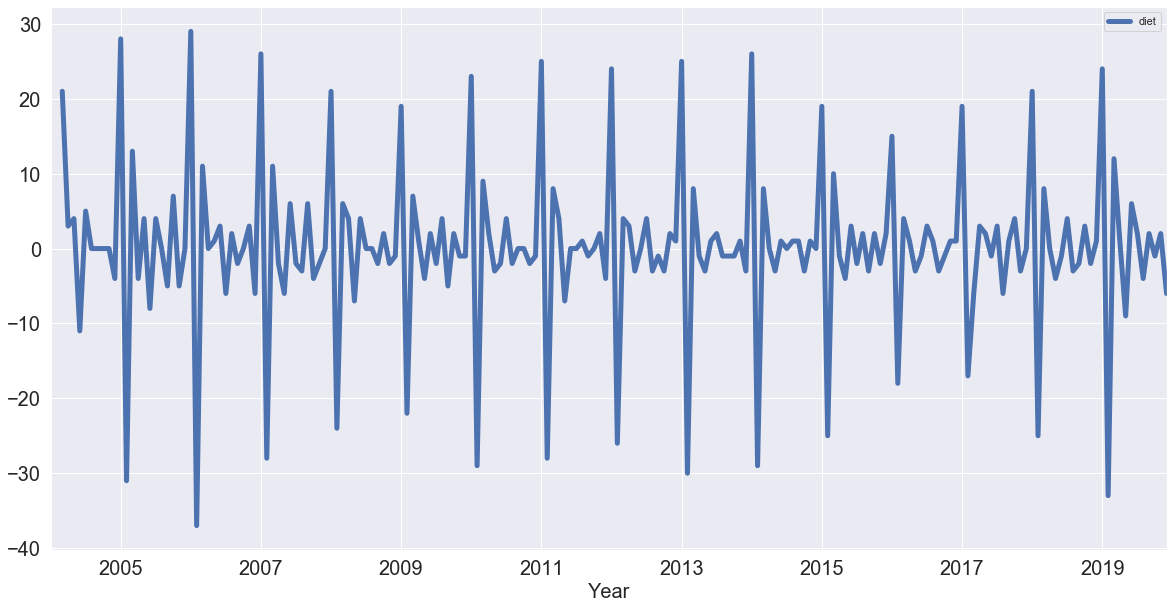

In [86]:
diet.diff().diff().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year', fontsize=20)

## Periodicity and Autocorrelation
- analyze your periodicity in your times series by looking at its autocorrelation function.

- A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months.
- if you took the time series and moved it 12 months backwards or forwards, it would map onto itself in some way.
- The correlation coefficient of two variables captures how linearly related they are.


In [87]:
from sklearn import datasets
iris=datasets.load_iris()
df_iris=pd.DataFrame(data=np.c_[iris['data']])

numpy.c_  Translates slice objects to concatenation along the second axis.

In [88]:
df_iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [89]:
df_iris=pd.DataFrame(data=np.c_[iris['data'],iris['target']])

In [90]:
df_iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [91]:
df_iris=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Just as a reminder for you to understand this data set, all flowers contain a sepal and a petal. The sepal encloses the petals and is typically green and leaf-like, while the petals are typically colored leaves. The 'target' column, which is the target variable, is the species of the iris flowers, which can either be Versicolor, Virginica or Setosa. In the table above, they are encoded as 0, 1, and 2.

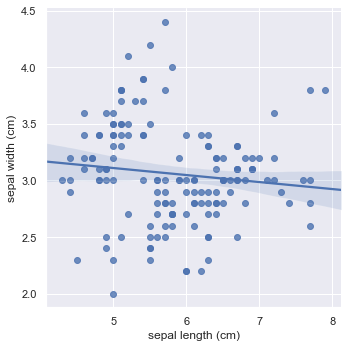

In [93]:
sns.lmplot(x='sepal length (cm)',y='sepal width (cm)',fit_reg=True,data=df_iris)

fit_reg=True gives the linear regression line in the plot

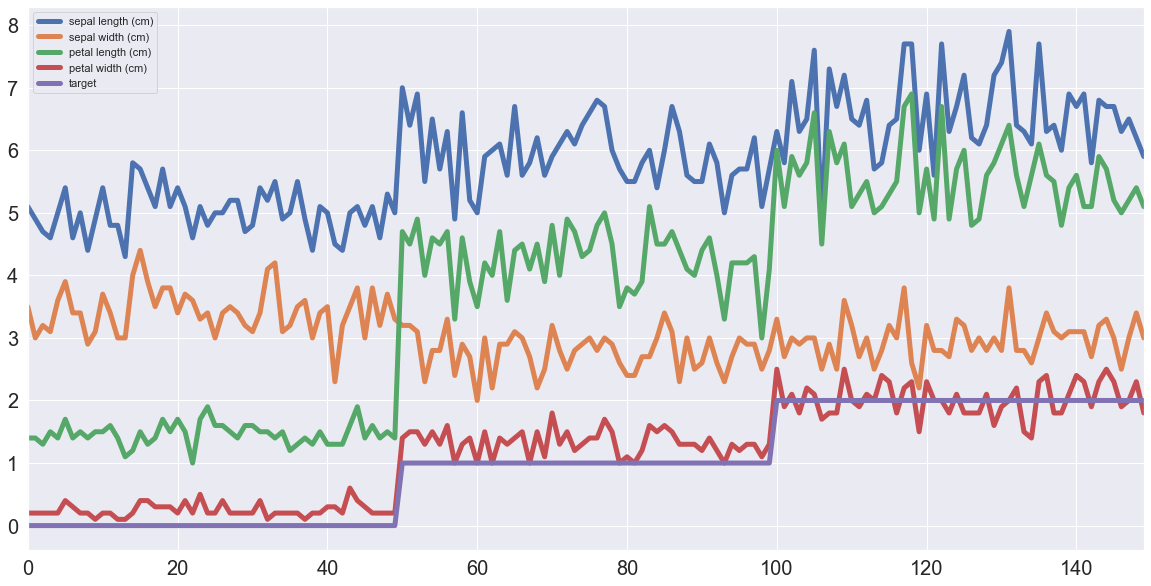

In [96]:
df_iris.plot(figsize=(20,10),linewidth=5,fontsize=20)

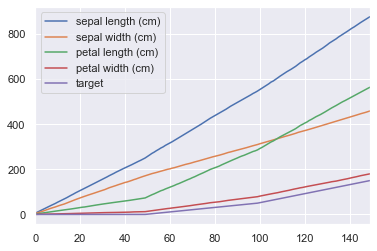

In [119]:
df_iris.cumsum().plot()

In [122]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [126]:
df_iris.columns=['a','b','c','d','t']
df_iris

,a,b,c,d,t
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Plot different scatter in different images

No handles with labels found to put in legend.


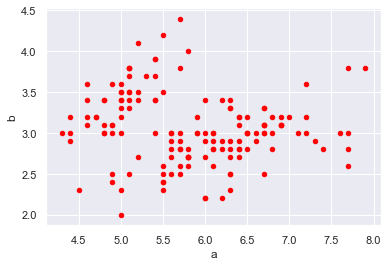

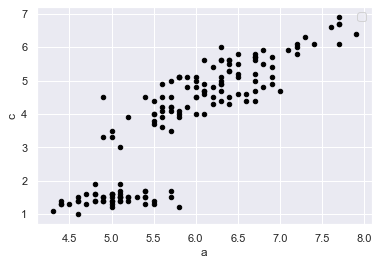

In [140]:
df_iris.plot(x='a',y='b',kind='scatter',color='red')
df_iris.plot(x='a',y='c',kind='scatter',color='black')
plt.legend()

But when we wish to merege them we can use plt.gca stands for 'get current axis'

No handles with labels found to put in legend.


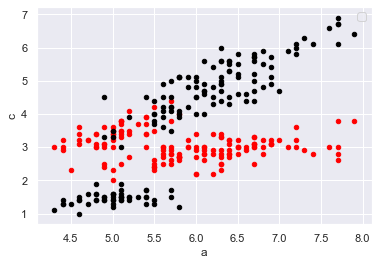

In [142]:
# gca stands for 'get current axis'
ax=plt.gca()
df_iris.plot(x='a',y='b',kind='scatter',color='red',ax=ax)
df_iris.plot(x='a',y='c',kind='scatter',color='black',ax=ax)
plt.legend()

pd.Series([]) : One-dimensional ndarray with axis labels (including time series).

In [144]:
data=pd.Series([])

In [147]:
for i in range(len(df_iris)):
    data[i]=i

In [148]:
data

0        0
1        1
2        2
3        3
4        4
      ... 
145    145
146    146
147    147
148    148
149    149
Length: 150, dtype: int64

df.insert() or pd.insert() used to insert a column in dataframe

In [163]:
df_iris.insert(0,'index',data)

In [164]:
df_iris

,index,a,b,c,d,t
0,0,5.1,3.5,1.4,0.2,0.0
1,1,4.9,3.0,1.4,0.2,0.0
2,2,4.7,3.2,1.3,0.2,0.0
3,3,4.6,3.1,1.5,0.2,0.0
4,4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2.0
146,146,6.3,2.5,5.0,1.9,2.0
147,147,6.5,3.0,5.2,2.0,2.0
148,148,6.2,3.4,5.4,2.3,2.0


df.drop() with inplace=True is used to drop column from dataframe and changes in the dataframe object

In [167]:
df_iris.drop('index',axis=1,inplace=True)

In [168]:
df_iris

,a,b,c,d,t
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [169]:
df_iris.insert(0,'index',data)

In [170]:
df_iris

,index,a,b,c,d,t
0,0,5.1,3.5,1.4,0.2,0.0
1,1,4.9,3.0,1.4,0.2,0.0
2,2,4.7,3.2,1.3,0.2,0.0
3,3,4.6,3.1,1.5,0.2,0.0
4,4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2.0
146,146,6.3,2.5,5.0,1.9,2.0
147,147,6.5,3.0,5.2,2.0,2.0
148,148,6.2,3.4,5.4,2.3,2.0


In [171]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

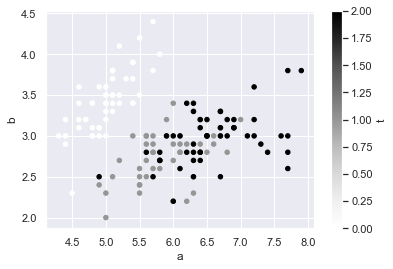

In [186]:
ax=plt.gca()
df_iris.plot(x='a',y='b', kind='scatter',ax=plt.gca(),c='t')
# df_iris.plot(x='index',y='b',kind='scatter',ax=plt.gca(),c='black')

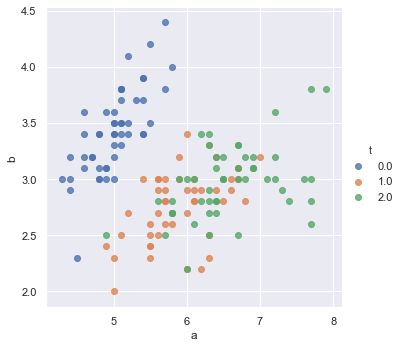

In [189]:
sns.lmplot(x='a', y='b', fit_reg=False, data=df_iris, hue='t');

In [191]:
df_iris.drop('index',axis=1,inplace=True)

## Correlation coefficients
https://www.youtube.com/watch?v=ugd4k3dC_8Y&t=319s
- The correlation coefficient (ρ) is a measure that determines the degree to which two variables' movements are associated.
- correlation coefficient, generated by the Pearson product-moment correlation, may be used to measure the linear relationship between two variables.  in a non-linear relationship, this correlation coefficient may not always be a suitable measure of dependence
-  used to measure the strength of the relationship between two variables.
- Positive correlation is a relationship between two variables in which both variables move in tandem—that is, in the same direction.
- Negative correlation or inverse correlation is a relationship between two variables whereby they move in opposite directions. 
- Negative correlation is a key concept in portfolio construction, as it enables the creation of diversified portfolios that can better withstand portfolio volatility and smooth out retruns.


![Image of Correlation](https://www.investopedia.com/thmb/N2u-3u9xNBH71PzyS9jPwwqJDEY=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/TC_3126228-how-to-calculate-the-correlation-coefficient-5aabeb313de423003610ee40.png)

- We can see the correlation coefficient (bottom of the chart) is currently at .7919, which is close to signaling a strong positive correlation. A reading above .50 typically signals a strong positive correlation.
![Image of Correlation](https://www.investopedia.com/thmb/YC7WG_pmmpJNcPTRN0B2cHdJQdQ=/932x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/jpm_xlf_cc-5bfd882446e0fb0051d5c672)

Formula for correlation coefficient

![z](https://miro.medium.com/max/222/0*IdklQcyevlfEgNVM)

![covariance](https://miro.medium.com/max/863/0*b5WYHrsFP0q4Pna2)

In [194]:
df_iris.corr()

,a,b,c,d,t
a,1.000000,-0.117570,0.871754,0.817941,0.782561
b,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
c,0.871754,-0.428440,1.000000,0.962865,0.949035
d,0.817941,-0.366126,0.962865,1.000000,0.956547
t,0.782561,-0.426658,0.949035,0.956547,1.000000


- that 'sepal length (cm)' and 'sepal width (cm)' seem to be negatively correlated! And they are, over the entire population of flowers measured. You see that the correlation coefficent is -0.1. However, they are not negatively correlated within each species, as the coefficient is 0.78.
- this is known as Simpson's paradox and is essential when thinking about causal inference. 

### compute the correlation coefficients of each pair of measurements within each species
- The way to do this is by chaining the .groupby() and .corr() methods, to group by the target and print the correlation coefficient

In [220]:
df_iris.groupby(['t']).corr()

a         b         c         d
t                                            
0.0 a  1.000000  0.742547  0.267176  0.278098
    b  0.742547  1.000000  0.177700  0.232752
    c  0.267176  0.177700  1.000000  0.331630
    d  0.278098  0.232752  0.331630  1.000000
1.0 a  1.000000  0.525911  0.754049  0.546461
    b  0.525911  1.000000  0.560522  0.663999
    c  0.754049  0.560522  1.000000  0.786668
    d  0.546461  0.663999  0.786668  1.000000
2.0 a  1.000000  0.457228  0.864225  0.281108
    b  0.457228  1.000000  0.401045  0.537728
    c  0.864225  0.401045  1.000000  0.322108
    d  0.281108  0.537728  0.322108  1.000000

- For target 0, the sepal length and width have a correlation of 0.75;
- For target 1, you have a coefficient of 0.5; And
- For target 2, you get a correlation of 0.46.
These are all decreasing amounts of positive correlation, but they're all a lot more positively correlated than your original negative correlation was.

In [203]:
df_inew=df_iris.head(5)

In [204]:
df_inew

,a,b,c,d,t
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [205]:
df_inew.corr()

,a,b,c,d,t
a,1.000000,0.680019,-0.170499,NaN,NaN
b,0.680019,1.000000,-0.136590,NaN,NaN
c,-0.170499,-0.136590,1.000000,NaN,NaN
d,NaN,NaN,NaN,NaN,NaN
t,NaN,NaN,NaN,NaN,NaN


In [211]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.807137,0.373094
gym,0.807137,1.000000,0.333592
finance,0.373094,0.333592,1.000000


Text(0.5, 0, 'Year')

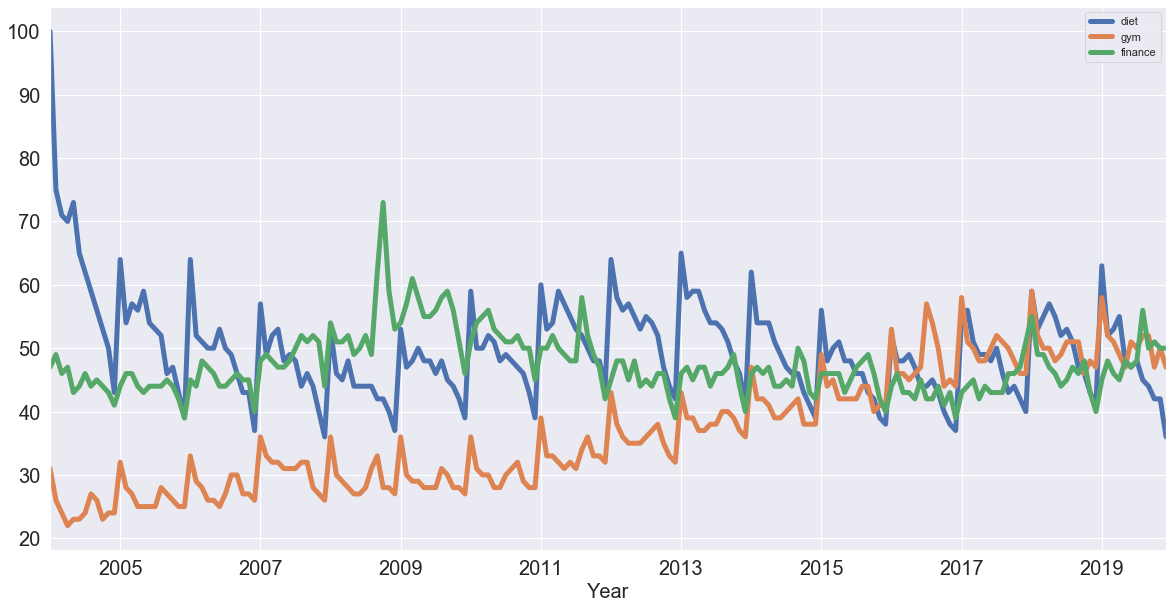

In [221]:
df.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)

In [259]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.069890,-0.041507
gym,-0.069890,1.000000,-0.208631
finance,-0.041507,-0.208631,1.000000


- From the correlation coefficient, 'diet' and 'gym' are negatively correlated. 
- However, from looking at the times series, it looks as though their seasonal components would be positively correlated and their trends negatively correlated.

Text(0.5, 0, 'Year')

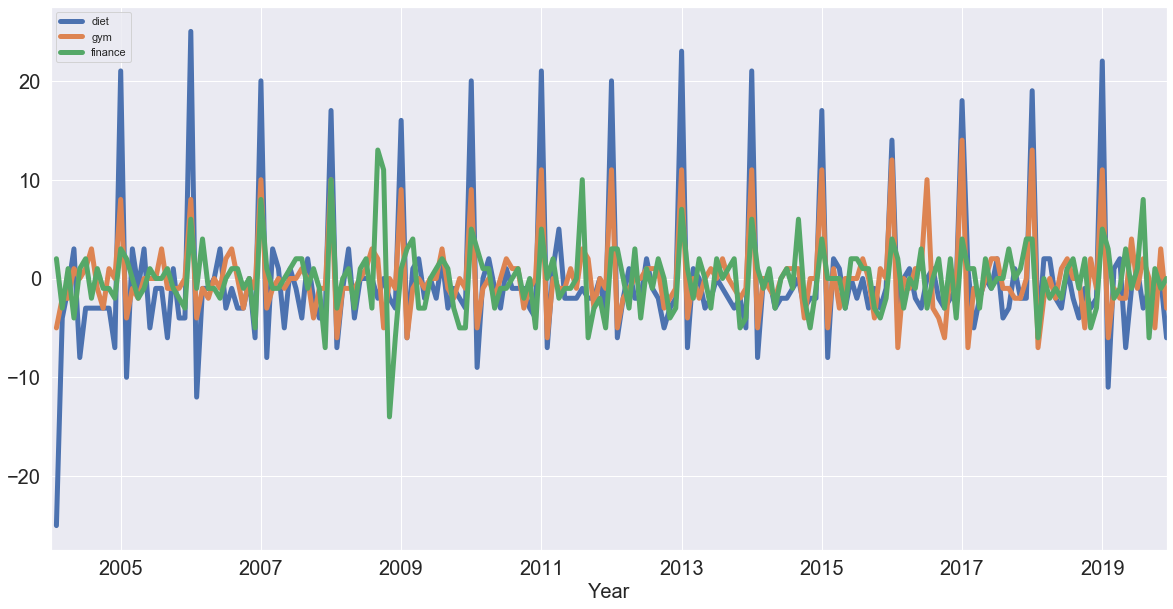

In [223]:
df.diff().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)

In [264]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.807137,0.373094
gym,0.807137,1.000000,0.333592
finance,0.373094,0.333592,1.000000


now, you can see that with the seasonal component, 'diet' and 'gym' are highly correlated, with a coefficient of 0.76.

## Autocorrelation

- Autocorrelation is a mathematical representation of the degree of similarity between a given time series and a lagged version of itself over successive time intervals. 
- It is the same as calculating the correlation between two different time series, except autocorrelation uses the same time series twice: once in its original form and once lagged one or more time periods. 
- Technical analysts can use autocorrelation to see how much of an impact past prices for a security have on its future price.

Use the plotting interface of pandas, which has the autocorrelation_plot() function. You can use this function to plot the time series 'diet':

it's time to plot the autocorrelation of the 'diet' series: on the x-axis, you have the lag and on the y-axis, you have how correlated the time series is with itself at that lag.

- So, this means that if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.
- you should expect to see here is a spike in the autocorrelation function at 12 months: the time series is correlated with itself shifted by twelve months.

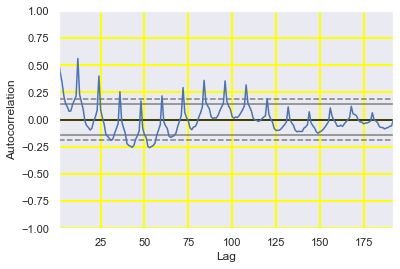

In [265]:
pd.plotting.autocorrelation_plot(diet).grid(color='yellow', linestyle='-', linewidth=2)

- If included more lags in your axes, you'd see that it is 12 months at which you have this huge peak in correlation.
-  you have a correlation of itself with itself at a lag of 0.
- The dotted lines in the above plot actually tell you about the statistical significance of the correlation. In this case, you can say that the 'diet' series is genuinely autocorrelated with a lag of twelve months.

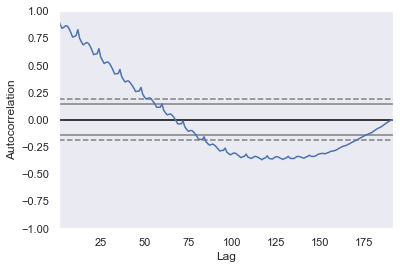

In [241]:
pd.plotting.autocorrelation_plot(df[['gym']])

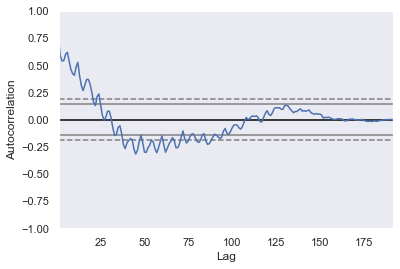

In [242]:
pd.plotting.autocorrelation_plot(df[['finance']]).plot